# 阶段八·模块一·作业

## 导入数据

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # 导入鸢尾花数据
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # 切分数据集,网格搜索，交叉验证
from sklearn.linear_model import LogisticRegression as LR # 逻辑回归
from sklearn.preprocessing import StandardScaler # 标准化

In [ ]:
# LogisticRegression(
#     penalty='l2',          # l2正则化--岭回归 l1正则化--lasso 默认l2
#     *,
#     dual=False,
#     tol=0.0001,
#     C=1.0,                 # C越小表示惩罚力度越大，C越大表示惩罚力度越小
#     fit_intercept=True,
#     intercept_scaling=1,
#     class_weight=None,
#     random_state=None,
#     solver='lbfgs',        # 梯度下降的方式
#     max_iter=100,          # 梯度下降会有迭代次数
#     multi_class='auto',
#     verbose=0,
#     warm_start=False,
#     n_jobs=None,
#     l1_ratio=None,
# )

In [41]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = load_iris().data

In [4]:
y = load_iris().target

In [6]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 切分数据集

In [16]:
# 切分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.3,random_state=420)

## 使用标准化包，对训练集来学习，从而对训练集和测试集来做标准化

In [32]:
# 对训练集和测试集做标准化--去量纲
std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

## 在确定12范式的情况下，使用网格搜索判断solver，C的最优组合

In [26]:
# 查看C在L1、L2下训练集和测试集的表现
L1 = []
L2 = []

L1test = []
L2test = []

for i in np.linspace(.05,1,19):
    # 实例化模型并训练
    lrl1 = LR(penalty='l1',solver='liblinear',C=i,max_iter=150).fit(Xtrain,Ytrain)
    lrl2 = LR(penalty='l2',solver='liblinear',C=i,max_iter=150).fit(Xtrain,Ytrain)
    
    # 记录训练集的分数
    L1.append(lrl1.score(Xtrain,Ytrain))
    L2.append(lrl2.score(Xtrain,Ytrain))
    
    # 记录测试集的分数
    L1test.append(lrl1.score(Xtest,Ytest))
    L2test.append(lrl2.score(Xtest,Ytest))

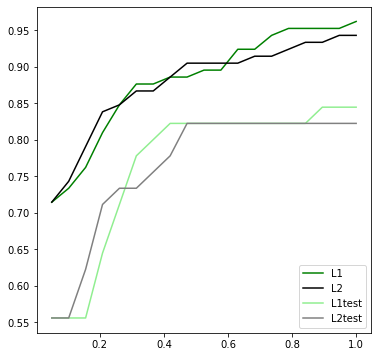

In [27]:
# 绘图
from matplotlib import pyplot as plt

graph = [L1,L2,L1test,L2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i]) 
plt.legend(loc=4) #图例的位置在哪里?4表示，右下⻆
plt.show()

- 因L1范式，不支持网格搜索的sag、newton-cg、lbfgs，因此选用L2进行训练

In [35]:
p = {
    'C': list(np.linspace(.05,1,19)),
    'solver': ['liblinear','sag','newton-cg','lbfgs']
}

model = LR(penalty='l2',max_iter=10000)

GS = GridSearchCV(model,p,cv=5)
GS.fit(Xtrain_,Ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.05, 0.10277777777777777, 0.15555555555555556,
                               0.20833333333333331, 0.2611111111111111,
                               0.3138888888888889, 0.36666666666666664,
                               0.41944444444444445, 0.4722222222222222, 0.525,
                               0.5777777777777778, 0.6305555555555556,
                               0.6833333333333333, 0.7361111111111112,
                               0.788888888888889, 0.8416666666666667,
                               0.8944444444444445, 0.9472222222222223, 1.0],
                         'solver': ['liblinear', 'sag', 'newton-cg', 'lbfgs']})

In [36]:
GS.best_score_

0.9714285714285715

In [37]:
GS.best_params_

{'C': 0.41944444444444445, 'solver': 'sag'}

## 将最优的结果重新用来实例化模型，查看训练集和测试集下的分数

In [38]:
model_ = LR(penalty='l2',max_iter=10000,C=GS.best_params_['C'],solver=GS.best_params_['solver'])

In [39]:
model_.fit(Xtrain_,Ytrain)

LogisticRegression(C=0.41944444444444445, max_iter=10000, solver='sag')

In [40]:
model_.score(Xtrain_,Ytrain),model_.score(Xtest_,Ytest)

(0.9714285714285714, 0.9555555555555556)

## 计算准确率

In [45]:
# 使用模型进行预测
y_pred = model_.predict(Xtest_)
y_pred

array([1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       2])

In [44]:
Ytest

array([1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2])

In [46]:
from sklearn.metrics import precision_score

In [47]:
precision_score(y_pred,Ytest,average='micro')

0.9555555555555556